## Seminario Análisis de Datos Exploratorio
Bienvenidos al notebook principal de este seminario/clase/charla. Aquí tendréis un desglose paso a paso de cómo implementar las diferentes secciones que iremos viendo durante la presentación en Python. Podéis seguir la clase mientras vais ejecutando el notebook o simplemente dejarlo para dar un repaso posterior a todos los conceptos. Aquí incluiré teoría relevante para cada parte y códigos esenciales para la ejecución.

### Requisitos previos
Si nunca habéis trabajado con Jupyter notebooks es posible que os sorprenda el formato. Para resumir mucho, los Jupyter notebooks son plataformas de ejecución de código, en las que podemos combinar secciones explicativas en lenguaje markdown (como por ejemplo apuntes, como en este caso) y secciones en las que ejecutar el código paso a paso.

Es una forma muy útil de trabajar en contexto de ciencia de datos, ya que podemos ir haciendo las diferentes partes que componen un análisis y presentar los resultados con breves explicaciones, sin estar limitados por el formato de comentarios que incluyen los lenguajes de programación.

Para poder ejecutarlo en VSCode, que es lo que yo estoy utilizando, necesitaréis la extensión de Jupyter y, para poder ejecutar el código, la biblioteca ipykernel, que podéis instalar con `pip install ipykernel` en vuestro entorno virtual.

Si tenéis dudas o dificultades podéis acudir a la documentación oficial de VSCode para trabajar con Jupyter:

https://code.visualstudio.com/docs/datascience/jupyter-notebooks

O podemos verlo al final de la clase si nos sobra tiempo.


### ¿Qué es el análisis de datos exploratorio?
Se trata del proceso inicial de cualquier trabajo con datos, donde buscamos hacer un resumen de las principales características que presentan. Nos permite identificar patrones en los datos, relaciones entre variables, distribuciones, anomalías, etc.

Es importante realizar este proceso antes de cualquier metodología más avanzada. Por ejemplo, cuando se quiere implementar un algoritmo de Machine Learning, ya que nos permite ganar conocimiento del dato y con ello guiar las decisiones en el trabajo.

Algunos puntos importantes que identificamos a través de este análisis:

1. Calidad del dato: Ver si existen valores perdidos, errores o valores atípicos.
2. Patrones: Identificar correlaciones, patrones o tendencias.
3. Comprobación de supuestos: Importante para determinar si podemos utilizar ciertas herramientas estadísticas o si necesitamos transformar los datos.

Un ejemplo sencillo: si queremos realizar predicciones sobre una variable, como evaluar la probabilidad de ictus en una persona en base a una serie de variables médicas y personales. La variable que queremos predecir (ya veréis más adelante con detalle todo este proceso) tiene un tipo concreto, en este caso categórica, y saber esto nos permite identificar qué modelos podemos utilizar y cuáles no. La estructura y tipología de los datos es parte fundamental de lo que analizamos en un análisis exploratorio.

### Herramientas

En líneas generales, vamos a trabajar dentro del entorno de Python, aunque hay otros lenguajes de programación orientados a estadística (como R). En este bootcamp, y en general en el ámbito laboral, nos vamos a encontrar con Python como el lenguaje estrella. Esto se debe a que dispone de unas librerías muy eficientes a la hora de trabajar con conjuntos de datos, análisis estadísticos y cálculo numérico, y por supuesto, sus librerías de ML.

Vuestros compañeros de aventuras en los siguientes meses van a ser las siguientes librerías, por lo que es bueno tenerlas presentes:

- numpy: Cálculos numéricos, trabajo con arrays.
- pandas: Gestión de conjuntos de datos (dataframes), lectura de archivos de datos (csv, excel), transformaciones...
- seaborn/matplotlib: Visualización de datos, gráficos.
- scikit-learn: Librería de herramientas de cálculo estadístico. 
- scipy: Herramientas para cálculo estadístico más avanzado. Complementa numpy para análisis más complejos.

Habrá muchas otras que utilizaréis (ya os sonará optuna), pero estas son las más relevantes para el tema que nos ocupa hoy.

### Tipos de datos
No podemos empezar a hacer un análisis exploratorio eficiente sin entender algunos puntos teóricos claves. Previamente ya hicimos alusión al concepto de datos categóricos, pero exactamente, ¿a qué nos referimos?

Para facilitar el entendimiento, vamos a hablar de variables en lugar de datos en general. Y ¿qué es una variable?

Una variable es cualquier característica que podemos medir u observar en nuestro conjunto de datos. Por ejemplo:

- La edad de una persona
- El salario anual
- El número de hijos
- El género
- La temperatura de una ciudad

Las variables pueden ser de diferentes tipos, y esto determina cómo podemos analizarlas y qué operaciones podemos realizar con ellas. Las dos grandes categorías son:

1. Variables Cuantitativas (Numéricas)
    - Continuas: Pueden tomar cualquier valor dentro de un rango (ejemplo: altura, peso, temperatura)
    - Discretas: Solo pueden tomar valores enteros (ejemplo: número de hijos, número de productos)

2. Variables Cualitativas (Categóricas)
    - Nominales: Categorías sin orden natural (ejemplo: color de ojos, género)
    - Ordinales: Categorías con un orden natural (ejemplo: nivel educativo, satisfacción del cliente)
    - Dicotómicas: Solo pueden tomar dos valores (ejemplo: sí/no)

Entender el tipo de variable es fundamental para elegir las técnicas de análisis y visualización más apropiadas. Se pueden ampliar las categorías con más detalles, pero por el momento esta clasificación nos vale.

¿Cómo podemos ver el tipo de variable utilizando Python?

Vamos a utilizar para trabajar el dataset 'tips' incluido en la biblioteca de seaborn, para por el momento evitar tener que importar algún dataset externo. 

No obstante, si alguien quiere importar su propio dataset, o simplemente ver como se haría (si se ejecuta dará error a no ser que tengais el archivo en vuestro directorio):

In [ ]:
import pandas as pd
df = pd.read_csv('data.csv')
df = pd.read_excel('data.xlsx')
df = pd.read_json('data.json')

En general se tiende a trabajar con datos tabulares (formato tabla) y en formato wide, existen dos formatos (wide y long):
En el formato wide, cada fila representa una única observación y cada columna una variable diferente. Por ejemplo, para datos de estudiantes:

| ID | Nombre | Edad | Nota1 | Nota2 |
|----|--------|------|-------|-------|
| 1  | Ana    | 20   | 8     | 7     |
| 2  | Luis   | 21   | 9     | 8     |

En el formato long, cada fila representa una única medición. El mismo ejemplo en formato long:

| ID | Nombre | Edad | Asignatura | Nota |
|----|--------|------|------------|------|
| 1  | Ana    | 20   | Nota1      | 8    |
| 1  | Ana    | 20   | Nota2      | 7    |
| 2  | Luis   | 21   | Nota1      | 9    |
| 2  | Luis   | 21   | Nota2      | 8    |

Para los formatos de archivo:
- CSV: Simple, legible, compatible con todos los sistemas, pero limitado para datos complejos
- JSON: Flexible, soporta datos anidados, pero ocupa más espacio y es más complejo de leer

Volviendo a la tipología del dato, pandas nos incluye una función que nos permitirá ver el tipo de dato de cada variable. Es importante notar que nos muestra el tipo considerando cómo trabaja Python internamente, lo cual nos sirve como guía para entender la naturaleza de los datos.

In [ ]:
import seaborn as sns

# Cargamos el dataset de tips con la función load_dataset de seaborn y lo guardamos en df
df = sns.load_dataset('tips')

# Mostramos el tipo de dato utilizando el método dtypes de pandas
print("Tipo de dato para cada columna:")
print(df.dtypes)

Tipo de dato para cada columna:
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


Los datos que figuran como float64 sabemos que son datos que incluyen un decimal, por lo que sabemos que es una variable cuantitativa o numérica.

Los datos que figuran como category serán aquellos que presentan diferentes categorías, por lo que sabemos que son cualitativos.

Sin embargo, los datos que figuran como int64 sabemos que son números enteros, esto a priori hace que puedan pertenecer a dos categorías: cuantitativa discreta o una cualitativa que ha sido definida con números (por ejemplo, si fuera la satisfacción del cliente del 1 al 5).

En este punto muchos pensaréis que el nombre de la variable ya nos dice qué tipo de dato es, lo cual es cierto, pero no siempre vamos a tener variables con nombres claros y definidos. Y, aunque en un mundo ideal todo conjunto de datos viene acompañado de un documento que especifica cada variable y los valores que puede tomar, tampoco esto es siempre así.

En estos casos puede hacerse una breve exploración de las primeras filas de la base de datos por si nos aclaran algo.

In [9]:
# El método head() de pandas nos permite visualizar las primeras filas del dataset
print('Primeras 10 filas del dataset:\n')
print(df.head(10))

# Alternativamente podemos utilizar el método tail() de pandas para visualizar las últimas filas del dataset
print('\nUltimas 10 filas del dataset:\n')
print(df.tail(10))

Primeras 10 filas del dataset:

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2

Ultimas 10 filas del dataset:

     total_bill   tip     sex smoker   day    time  size
234       15.53  3.00    Male    Yes   Sat  Dinner     2
235       10.07  1.25    Male     No   Sat  Dinner     2
236       12.60  1.00    Male    Yes   Sat  Dinner     2
237       32.83  1.17    Male    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3


Con esta primera y breve visión de la base de datos ya podemos imaginarnos que variables como 'smoker' será categórica dicotómica, ya que puede ser 'No' o 'Si'.

### Describir los datos

Más de uno debe estar pensando que esto está muy bien, pero que no nos da mucha información. Incluso si alguien va un poco avanzado, sabrá que hay métodos más efectivos de comprobar este tipo de información.

Por ello vamos a pasar al meollo del asunto: la descripción de los datos.

Como hemos mencionado antes, buscamos encontrar las características clave de los datos, para entender la estructura, distribución y posibles problemas de nuestro conjunto de datos.

Uno de los primeros métodos que podemos utilizar para hacer una brevísima descripción de los datos es el método `info` de pandas. Este nos dará los tipos de datos, como hemos visto antes, pero también el tamaño del dataset, los datos 'no nulos' (veremos más adelante su significación) y el tamaño que ocupa en memoria.

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


Pero esta información, si bien relevante, no es suficiente. Damos paso pues a la clave del EDA:

#### Estadísticos clave

Los estadísticos son medidas que nos permiten resumir y describir las características principales de un conjunto de datos. Los podemos agrupar en diferentes conceptos clave que nos permiten analizar:

- **Tendencia Central**: Nos van a permitir ver cuál es el valor de la variable más probable de encontrar.
    - **Media**: El promedio de todos los valores. `df.mean()`
    - **Mediana**: El valor central que divide el conjunto de datos en dos partes iguales. `df.median()`
    - **Moda**: El valor que aparece con más frecuencia. `df.mode()`
- **Dispersión**: Concentración de los valores en torno al centro de la distribución. 
    - **Desviación estándar**: Medida de dispersión que indica qué tan alejados están los valores de la media. `df.std()`
- **Forma**: Forma de la distribución, importante para ciertos supuestos como el de Normalidad (cuánto se parece la distribución a la Curva Normal)
    - **Asimetría**: Cómo de simétrica es la distribución y hacia qué lado tiende. `df.skew()`
    - **Kurtosis**: Cómo de 'apuntada' es la distribución. `df.kurtosis()`
    - **Cuartiles**: Dividen los datos en cuatro partes iguales, siendo especialmente útiles para identificar la distribución
- **Frecuencias**: Permiten ver si hay desbalance en los datos, cuántos valores únicos hay, si hay datos perdidos... `df.nunique()`, `df.isnull().sum()`, `df['column'].value_counts()`
- **Mínimo y Máximo**: Los valores más pequeños y más grandes en el conjunto de datos. `df.min()`, `df.max()`

Vamos a ver como se obtienen todas estas medidas en python, y veremos algunos ejemplos visuales de la forma de la distribución, ya que en vacío puede ser complejo de visualizar. Podemos obtener la mayoría de estas medidas de una 'tacada' utilizando el método `describe`.

In [18]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


Vaya, parece que el método `describe` esta roto, solo nos ha sacado 3 columnas de las 7 del dataset... AH NO, es que solo ha sacado aquellas con variables numéricas (float o int). Si lo pensamos tiene lógica, ¿tiene sentido que saquemos todos estos estadísticos para todo tipo de variables?

Comprobemoslo, podemos forzar a describe a incluir todas las variables de la siguiente forma:

In [ ]:
print(df.describe(include='all'))

        total_bill         tip   sex smoker  day    time        size
count   244.000000  244.000000   244    244  244     244  244.000000
unique         NaN         NaN     2      2    4       2         NaN
top            NaN         NaN  Male     No  Sat  Dinner         NaN
freq           NaN         NaN   157    151   87     176         NaN
mean     19.785943    2.998279   NaN    NaN  NaN     NaN    2.569672
std       8.902412    1.383638   NaN    NaN  NaN     NaN    0.951100
min       3.070000    1.000000   NaN    NaN  NaN     NaN    1.000000
25%      13.347500    2.000000   NaN    NaN  NaN     NaN    2.000000
50%      17.795000    2.900000   NaN    NaN  NaN     NaN    2.000000
75%      24.127500    3.562500   NaN    NaN  NaN     NaN    3.000000
max      50.810000   10.000000   NaN    NaN  NaN     NaN    6.000000


Como se puede ver, sacar la media de una variable que solo tiene categorías no tiene mucho sentido ¿no? Para estos casos tendremos que obtener otro estadístico más lógico, como la moda, o simplemente ver la frecuencia de cada categoría.

In [21]:
print(df['day'].mode()) # Metodo para sacar la moda de una columna categorica
print(df['day'].value_counts()) # Metodo para sacar la frecuencia de cada valor en una columna categorica

0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


Dos de las medidas que no estamos viendo en describe son la asimetría y la curtosis de las que hablamos antes. Pero, para poder entender estas medidas es importante primero hablar de la curva normal. 

La curva normal, o distribución normal, es una distribución de probabilidad con forma de campana simétrica, donde la mayoría de las observaciones se concentran alrededor de la media. Es importante en estadística porque:

- Es simétrica: los datos se distribuyen uniformemente a ambos lados de la media
- La media, mediana y moda coinciden en el centro
- Aproximadamente el 68% de los datos están dentro de una desviación estándar de la media
- El 95% de los datos están dentro de dos desviaciones estándar
- El 99.7% de los datos están dentro de tres desviaciones estándar

La asimetría mide cuánto se desvía una distribución de esta simetría perfecta:
- Asimetría positiva: cola más larga hacia la derecha
- Asimetría negativa: cola más larga hacia la izquierda
- Asimetría = 0: distribución simétrica

La curtosis mide cuán "puntiaguda" es la distribución en comparación con la normal:
- Curtosis positiva: más puntiaguda que la normal
- Curtosis negativa: más plana que la normal
- Curtosis = 0: igual que la normal

Muchos de los análisis estadísticos parten de la suposición de que los datos se van a ajustar a la curva normal, esto se debe a que muchos de los fenómenos naturales tienen distribuciones empíricas muy similares a la distribución teórica normal.

![Normal Distribution](./images/1.png)
![Normal Distribution](./images/2.png)
![Normal Distribution](./images/3.png)


La distribución normal es fundamental en estadística debido al Teorema Central del Límite:

Si se recolectan datos que son resultado de la suma de causas independientes entre sí, cada una con un efecto parcial, la distribución de los datos se aproximará más a la curva normal a medida que se recolecten más datos (independientemente de la distribución original de esos efectos parciales y siempre que la desviación típica de estos efectos sea finita).

Dicho de forma más simple: cuantos más datos tengamos, más se parecerá la distribución a una curva normal.

Para experimentar con el Teorema Central del Límite, puedes usar esta herramienta interactiva:

https://demonstrations.wolfram.com/CentralLimitTheoremAppliedToSamplesOfDifferentSizesAndRanges/

Despues de este viaje a la teoría de las distribuciones, que en verdad os podéis saltar de momento si veis que se complica mucho, vamos a ver algunos ejemplos cuando la distrbución no es simétrica.

Podeis ejecutar el código siguiente para ver los ejemplos, pero necesitaréis instalar la biblioteca scipy.

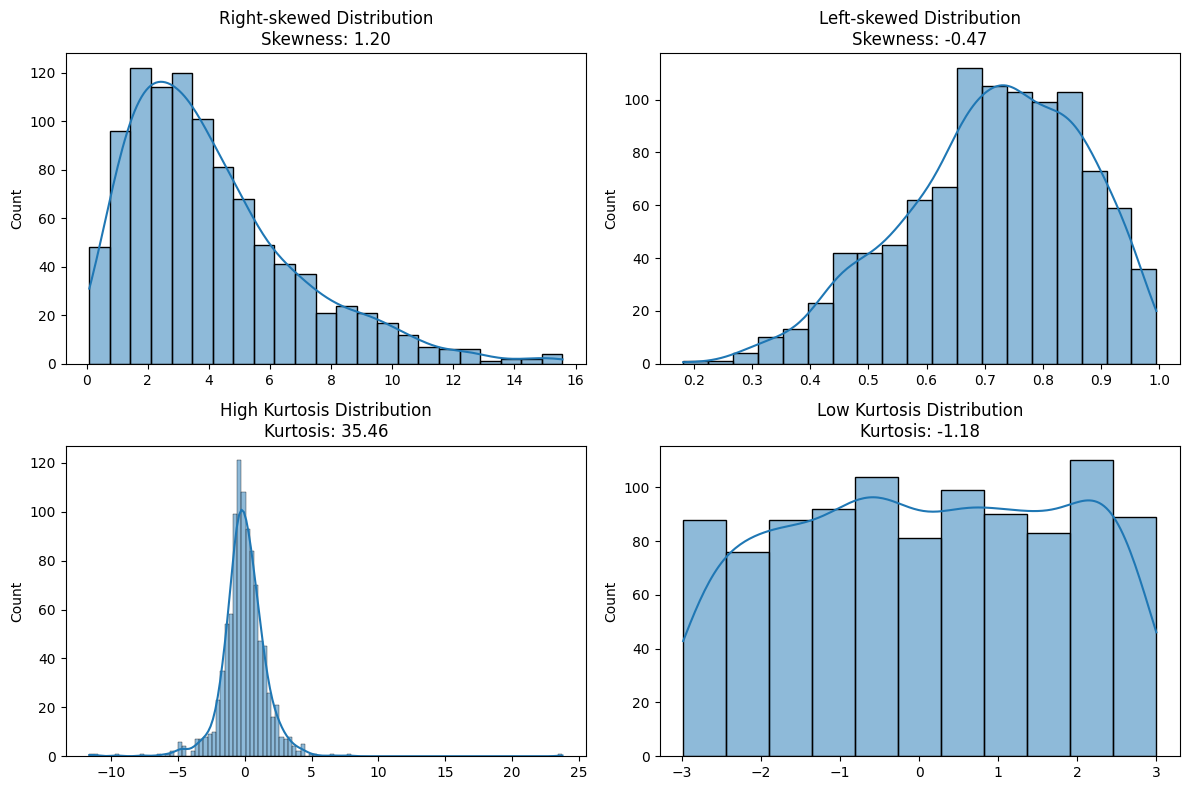

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

# Creamos datos random
np.random.seed(42)

# Asimetría derecha
right_skewed = np.random.gamma(2, 2, 1000)

# ASimetría izquierda
left_skewed = np.random.beta(5, 2, 1000)

# Kurtosis alta (leptocúrtica)
high_kurtosis = np.random.standard_t(df=3, size=1000)

# Kurtosis baja (mesocúrtica)
low_kurtosis = np.random.uniform(-3, 3, 1000)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(data=right_skewed, ax=axes[0,0], kde=True)
axes[0,0].set_title(f'Right-skewed Distribution\nSkewness: {scipy.stats.skew(right_skewed):.2f}')

sns.histplot(data=left_skewed, ax=axes[0,1], kde=True)
axes[0,1].set_title(f'Left-skewed Distribution\nSkewness: {scipy.stats.skew(left_skewed):.2f}')

sns.histplot(data=high_kurtosis, ax=axes[1,0], kde=True)
axes[1,0].set_title(f'High Kurtosis Distribution\nKurtosis: {scipy.stats.kurtosis(high_kurtosis):.2f}')

sns.histplot(data=low_kurtosis, ax=axes[1,1], kde=True)
axes[1,1].set_title(f'Low Kurtosis Distribution\nKurtosis: {scipy.stats.kurtosis(low_kurtosis):.2f}')

plt.tight_layout()
plt.show()

### Visualizaciones
Llegados a este punto más de uno debe estar pensando que este análisis exploratorio de datos es todo muy soso y seco. La buena noticia es que tenemos una forma alternativa de presentar muchos de estos datos de forma gráfica.

Mediante la biblioteca seaborn, aunque podemos utilizar también otras, podemos crear visualizaciones que nos permitan analizar de forma rápida diferentes aspectos de los datos, pero de una manera más agradable y fácil de visualizar. La mala noticia es que no podemos aplicarlo a todos los casos, pero algo es algo.

Algunas de las visualizaciones tradicionales en el análisis exploratorio de datos son:

- **Histograma**: Distribución de datos numéricos, como hemos visto antes en la simulación de distribuciones.
- **Box Plots**: Datos atípicos y dispersión de los datos.
- **Scatter Plots**: Relaciones entre variables.
- **Heatmaps**: Útiles para ver la fuerza de una correlación.

También tendremos los clásicos gráficos de barras para ver distribuciones de datos categóricos, y disponemos de otros gráficos (pie charts, line plots...), cada uno con una función, pero por el momento nos quedaremos con estos en la introducción.

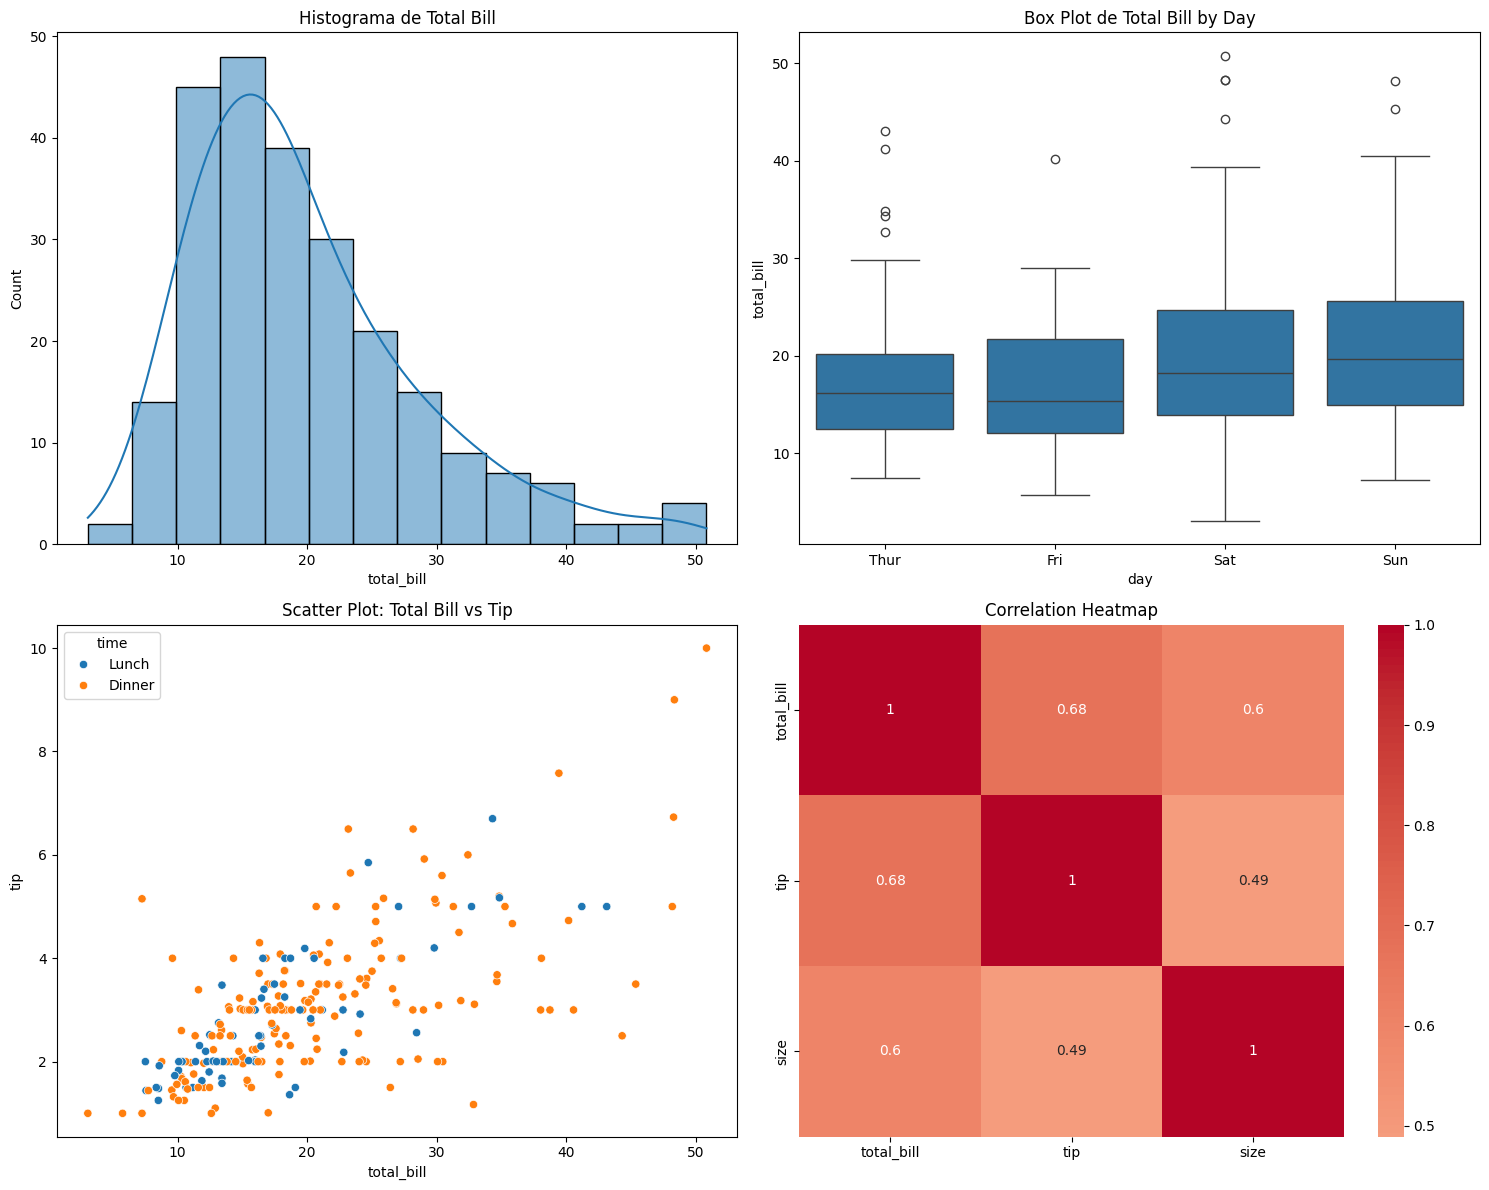

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histograma de total_bill
sns.histplot(data=df, x='total_bill', kde=True, ax=axes[0,0])
axes[0,0].set_title('Histograma de Total Bill')

# 2. Box plot de total_bill by day
sns.boxplot(data=df, x='day', y='total_bill', ax=axes[0,1])
axes[0,1].set_title('Box Plot de Total Bill by Day')

# 3. Scatter plot de total_bill vs tip
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time', ax=axes[1,0])
axes[1,0].set_title('Scatter Plot: Total Bill vs Tip')

# 4. Heatmap of correlation matrix
correlation_matrix = df[['total_bill', 'tip', 'size']].corr()
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            ax=axes[1,1])
axes[1,1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()

La particularidad del box-plot es que representa los cuatro cuartiles de la variable, y nos permite analizar la simetría de los datos.

Los puntos principales a observar en un box-plot son:

- **Mediana**: La línea central dentro de la caja representa el valor que divide el conjunto de datos en dos partes iguales.

- **Cuartiles (Q1 y Q3)**: Los bordes de la caja representan el primer (25%) y tercer (75%) cuartil. La longitud de la caja es el rango intercuartil (IQR).

- **Bigotes**: Se extienden hasta los valores máximo y mínimo que no son considerados atípicos (generalmente 1.5 * IQR desde los bordes de la caja).

- **Valores atípicos**: Los puntos individuales más allá de los bigotes representan observaciones que se desvían significativamente del resto de los datos.

- **Simetría**: Si la mediana está en el centro de la caja y los bigotes son aproximadamente de igual longitud, los datos son simétricos.

### Outliers o Datos Atípicos

Hemos mencionado en un par de ocasiones ya los datos atípicos u outliers. Estos datos son valores en una variable que se alejan en gran medida del valor esperado. 

¿Qué significa esto? Buena pregunta.

Depende del tipo de variable con la que estemos trabajando puede tener diferentes significados:

1. Error en la recogida del dato: Puede ser que el valor sea fruto de un error a la hora de tomar los datos y por tanto esté generando un sesgo en la realidad de la variable.
2. Es un dato real pero atípico: En algunos casos nos encontraremos que un dato puede ser exagerado pero que tenga sentido. Por ejemplo, si tomamos una medida de salario anual en la población, es muy probable que encontremos salarios que se alejen mucho del valor esperado, pero no por ello son erróneos.
3. Dato perdido: En algunos casos se puede notificar un valor perdido con un valor numérico elevado, para no confundirlo con un valor real (999 en una variable ordinal).

La decisión que tomemos sobre cómo gestionar estos datos dependerá del significado que presente y del tipo de análisis que realicemos. En algunos casos se podrán eliminar, si son fruto de errores o señalan un dato perdido, pero en otros tendremos que trabajar con ellos. Si no hay un gran número de valores atípicos no suelen ser problemáticos a la hora de calcular estadísticos, pero han de tomarse en cuenta antes de realizar conclusiones sobre resultados.

#### Identificación de outliers:

Tenemos varias formas de determinar si un valor es atípico o no. Una de ellas ya la hemos visto, usando el box-plot podemos ver qué valores se encuentran más alejados de lo esperado en la distribución. 

Si queremos medidas más objetivas, podemos utilizar los siguientes métodos:

- Usando el rango intercuartil (IQR): Diferencia entre el tercer y primer cuartil (Q3 - Q1). Se considera que un valor es atípico si está:
    - Por debajo de Q1 - 1.5 * IQR
    - Por encima de Q3 + 1.5 * IQR

- La regla de las 3 desviaciones estándar: Se considera que un valor es atípico si está:
    - Por debajo de la media - 3 * desviación estándar
    - Por encima de la media + 3 * desviación estándar

- Puntuaciones Z: También llamada estandarización, transforma los datos para que tengan media 0 y desviación estándar 1 (además, es una forma de poder comparar variables con distinta métrica). Se considera que un valor es atípico si su puntuación Z está:
    - Por debajo de -3
    - Por encima de 3

Estas reglas pueden aplicarse de forma más o menos restrictiva según el caso. En general se recomienda utilizar Puntuaciones Z.

In [33]:
import numpy as np
from scipy import stats

# 1. IQR 
Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Metodo IQR:")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
outliers_iqr = df[df['total_bill'].apply(lambda x: x < lower_bound or x > upper_bound)]
print(f"Numero de outliers: {len(outliers_iqr)}")
print("Outliers:", sorted(outliers_iqr['total_bill'].values), "\n")

# 2. 3 SD
mean = df['total_bill'].mean()
std = df['total_bill'].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

print("Método de 3 SD:")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
outliers_std = df[df['total_bill'].apply(lambda x: x < lower_bound or x > upper_bound)]
print(f"Numero de outliers: {len(outliers_std)}")
print("Outliers:", sorted(outliers_std['total_bill'].values), "\n")

# 3. Puntuaciones Z
z_scores = stats.zscore(df['total_bill'])
outliers_z = df[abs(z_scores) > 3]

print("Z-score Method:")
print(f"Number of outliers: {len(outliers_z)}")
print("Outlier values:", sorted(outliers_z['total_bill'].values))

Metodo IQR:
Lower bound: -2.82
Upper bound: 40.30
Numero de outliers: 9
Outliers: [np.float64(40.55), np.float64(41.19), np.float64(43.11), np.float64(44.3), np.float64(45.35), np.float64(48.17), np.float64(48.27), np.float64(48.33), np.float64(50.81)] 

Método de 3 SD:
Lower bound: -6.92
Upper bound: 46.49
Numero de outliers: 4
Outliers: [np.float64(48.17), np.float64(48.27), np.float64(48.33), np.float64(50.81)] 

Z-score Method:
Number of outliers: 4
Outlier values: [np.float64(48.17), np.float64(48.27), np.float64(48.33), np.float64(50.81)]


### Datos perdidos
La otra gran bestia de un buen análisis de datos exploratorio es analizar los datos perdidos. Estos datos son simplemente datos que no estan presentes en la variable, por el motivo que sea. Pueden aparecer como `null` lo cual facilita su identificación, pero también pueden estar señalados de otras formas, como se ha comentado previamente por ejemplo con valores muy por encima de lo esperado.

¿Por qué es importante tener en cuenta los datos perdidos? Principalmente porque generan los siguientes riesgos en nuestros análisis:

- Ineficiencia
- Falta de consistencia / sesgo
- Falta de coincidencia entre error tipo I empírico y nominal
- Perdida de potencia estadística
- Degradación de intervalos de confianza
- Errores típicos sesgados

El análisis de datos perdidos es un tema muy interesante pero amplísimo, aunque en este documento voy a introducir varios conceptos importantes, todos ellos se van a quedar cortos en comparación con la base teórica que hay detrás, si alguien tiene curiosidad o dudas puede consultarme y podemos verlo o puedo facilitar información al respecto. De primeras dejo un par de referencias interesantes:
- https://stefvanbuuren.name/fimd/ch-introduction.html
- Enders, C. K. (2010). Applied Missing Data Analysis. Guilford Press.

El cálculo de datos perdidos como se verá a continuación es muy sencillo si solo queremos ver los valores puros. Podemos ser un poco más visuales y mostrarlos de forma visual con un gráfico de barras, gráficos de calor (con colores representando donde hay más valores perdidos), etc. Como ejemplo se va a mostrar como ver los datos de forma puramente numérica y también con un gráfico de barras en seaborn para tener una referencia algo más visual.

In [34]:
print(df.isna().sum()) # Datos perdidos por columna
print(len(df.index)) # Datos totales en la base

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
244


Esta base de datos que estamos utilizando es tan buena que no tiene ni datos perdidos, lo cual nos va a complicar explicarlos, así que vamos a añadir aleatoriamente unos cuantos.

In [36]:
import numpy as np

np.random.seed(42)

# Copiamos el dataframe original para no modificarlo
df_with_missing = df.copy()

# Vamos a introducir valores perdidos en un 10% de los datos
for column in df_with_missing.columns:
    mask = np.random.random(len(df_with_missing)) < 0.1
    df_with_missing.loc[mask, column] = np.nan

# Volvemos a mostrar los datos perdidos por columna
print("Numero de valores perdidos por columna:")
print(df_with_missing.isna().sum())

Numero de valores perdidos por columna:
total_bill    27
tip           37
sex           19
smoker        22
day           26
time          27
size          23
dtype: int64


Podemos ver esta distribución de forma más visual con seaborn:

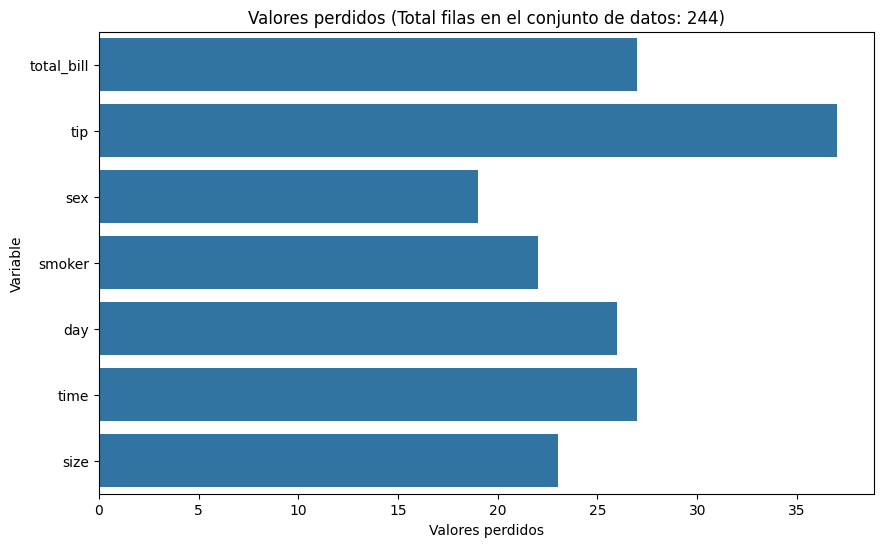

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_data = df_with_missing.isna().sum()

missing_df = missing_data.reset_index()
missing_df.columns = ['Variable', 'Valores perdidos']

# Visualizar los valores nulos en un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Valores perdidos', y='Variable', data=missing_df)
plt.title(f'Valores perdidos (Total filas en el conjunto de datos: {len(df_with_missing.index)})')
plt.show()

Podemos utilizar también librerias especializadas en el trabajo con datos perdidos como `missingno` para visualizarlo de forma sencilla y sin mucho código.

<Axes: >

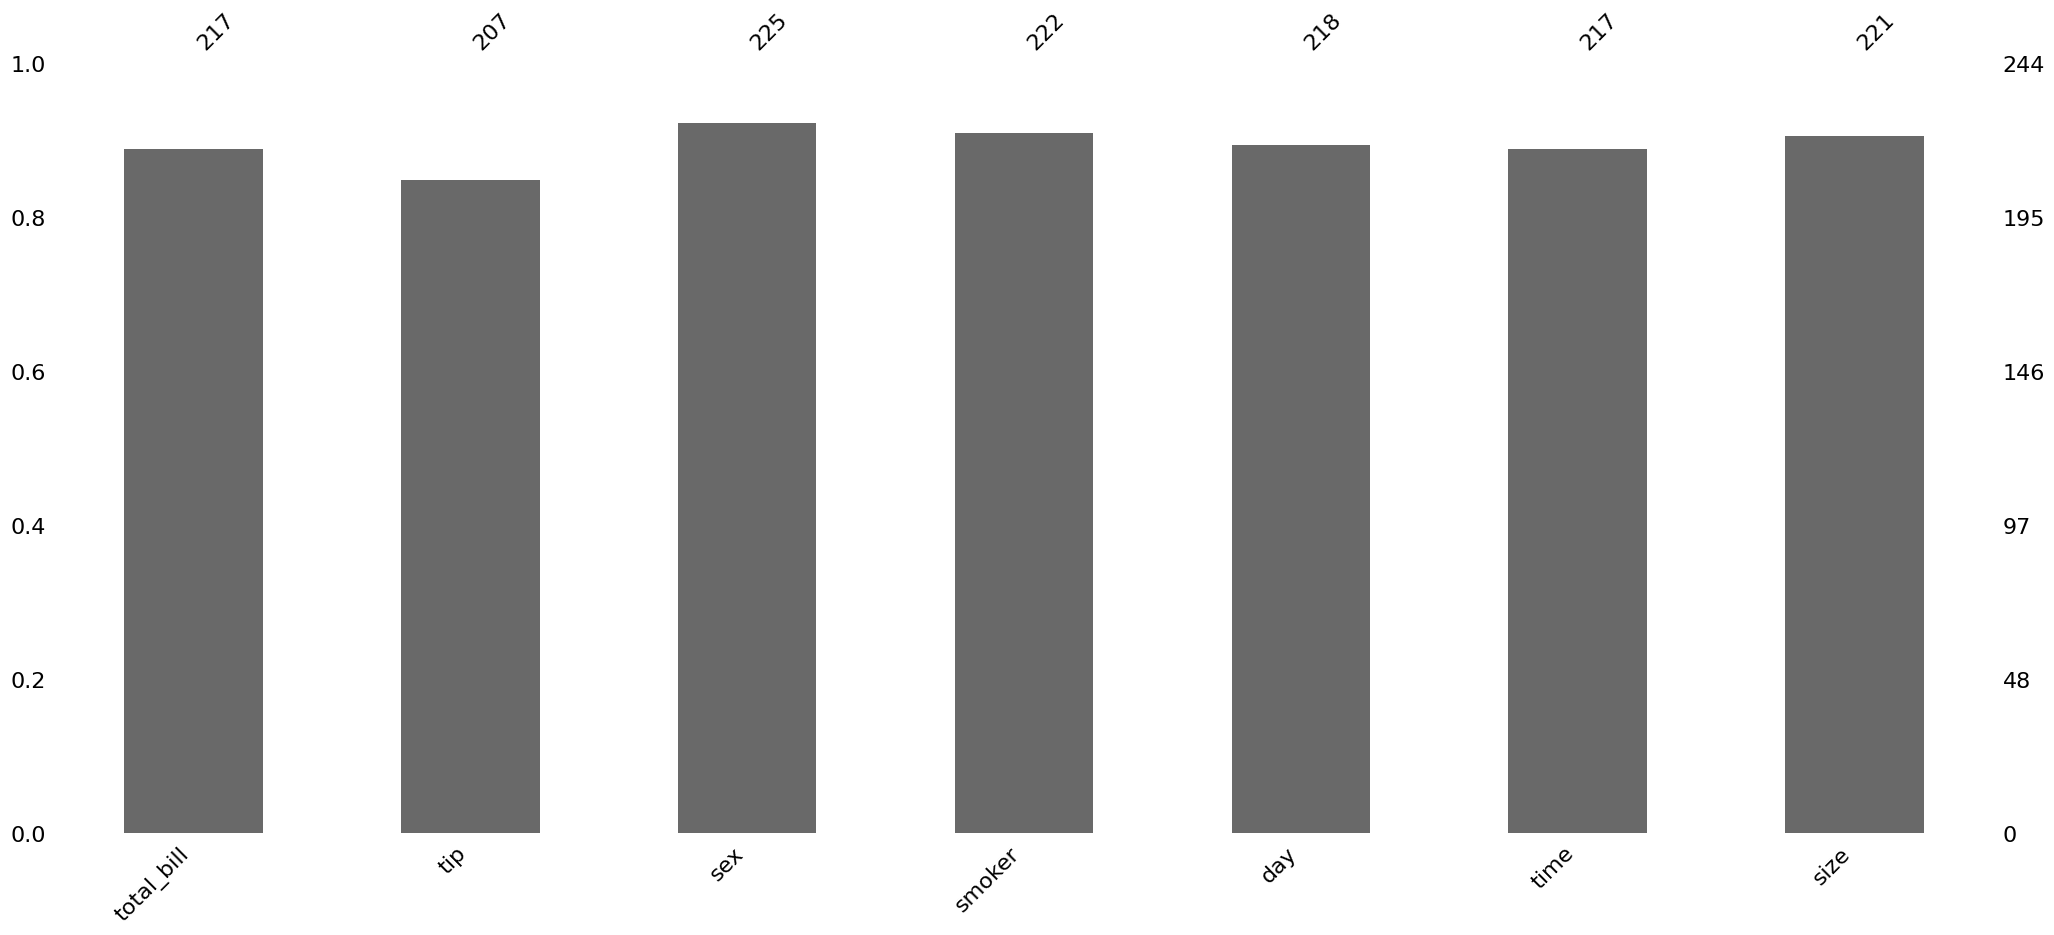

In [40]:
import missingno as msno

msno.bar(df_with_missing) # Gráfico de barras

E incluso podemos sacar un heatmap que nos enseñe la correlación entre variables respecto a los valores perdidos:
- Cuanto más cerca de -1 indica que si una variable aparece, la otra probablemente esté perdida
- Cuanto más cerca de 1 indica que si una variable aparece, la otra probablemente aparezca.

<Axes: >

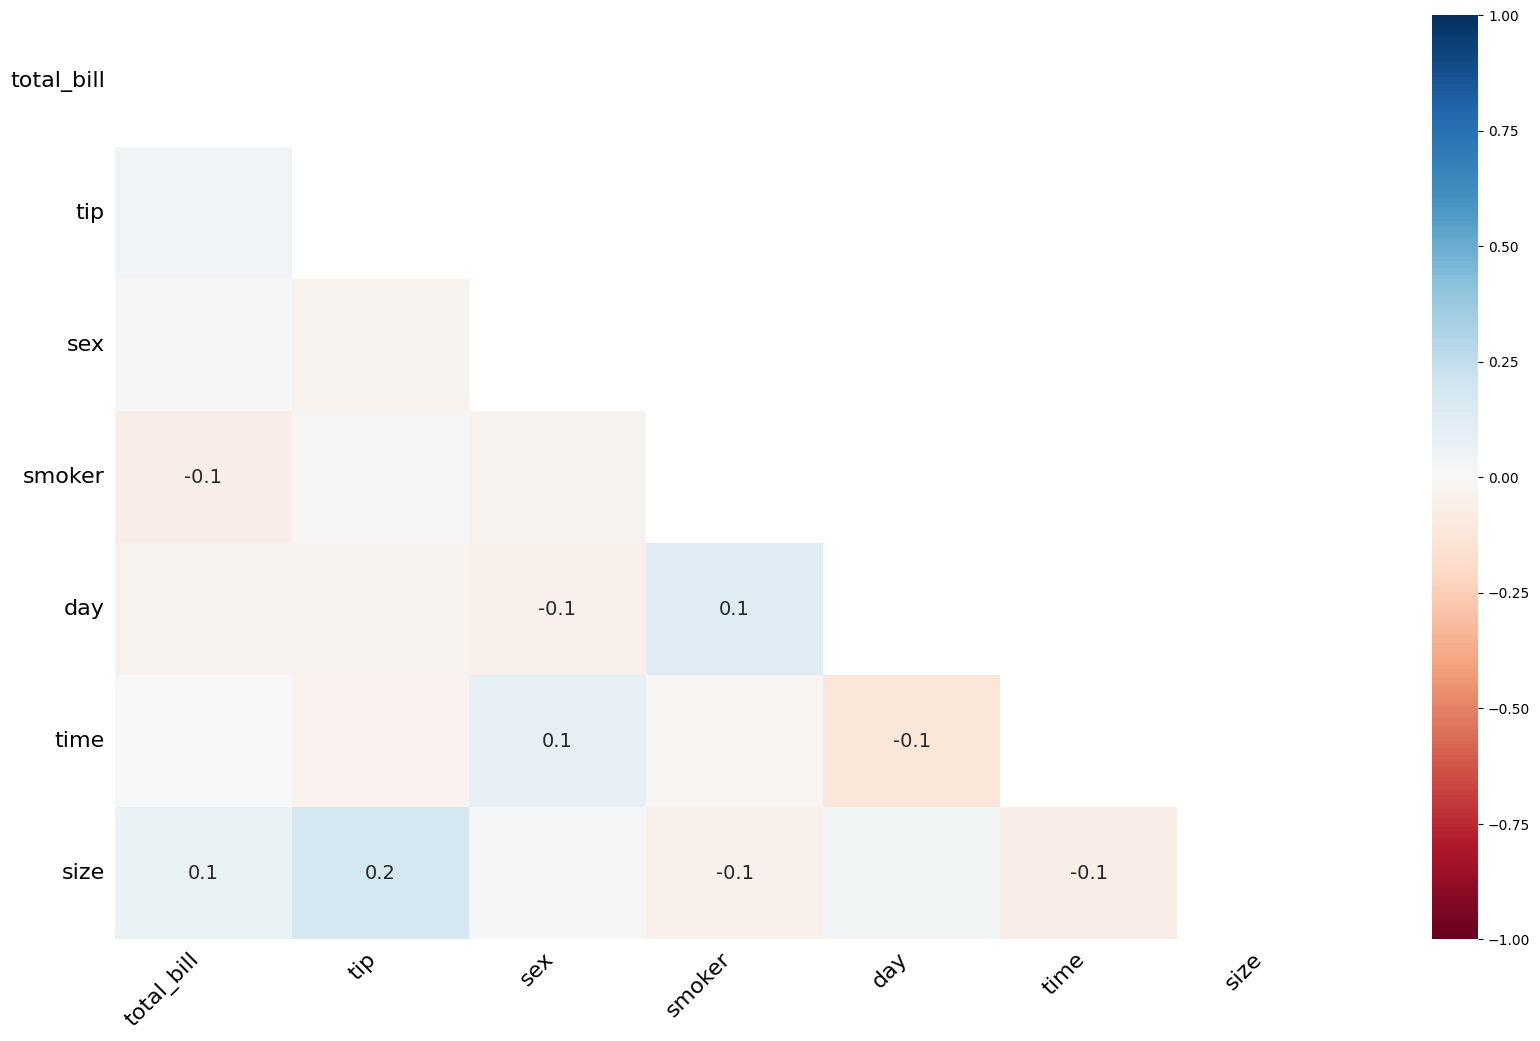

In [41]:
msno.heatmap(df_with_missing) # Mapa de calor de correlación de valores perdidos

Los datos perdidos pueden categorizarse de disinta manera en función de como se hayan perdido, pero, a pesar de que es un tema sumamente interesante, se escapa de la complejidad de esta clase, pero si a alguien le interesa puedo facilitar alguna información al respecto. 

En general, de las categorías posibles (MCAR, MAR y MNAR) asumiremos que nuestros datos se han perdido de forma aleatoria (MAR), ya que bajo ese supuesto podemos intentar solucionar la pérdida de datos, y es una situación más común. La forma de evaluar este tipo de patrones de datos perdidos es utilizando métodos estadísticos como ANOVA, pruebas t, etc. De nuevo, como se comentó previamente, se trata de un tema amplísimo, por lo que recomiendo investigar si os interesa ya que tiene un gran interés, pero también una alta complejidad. 

Lo que si es importante saber es como trabajar con esos datos perdidos una vez están identificados, esta parte pertenece más a la limpieza como tal de la base de datos y no tanto al análisis exploratorio, pero me parece relevante que os suene un poco para futuro.

--- Esta parte podeis ignorarla de momento y volver a ella cuando trabajeis con datos perdidos ---

---

Si se realiza una búsqueda en internet se pueden encontrar muchas formas que en líneas generales se han aceptado con bastante frecuencia y que probablemente a todo el mundo les suene:

- Sustituir los valores por la media
- Sustituir los valores por la moda
- Sustituir los valores por la mediana
- Sustituir los valores por valores predichos mediante un modelo de regresión lineal con los valores existentes
- Eliminación por lista
- Eliminación por pares (cálculo de medias y covarianzas en datos observados)

Todos estos métodos pueden ser útiles para sacarnos de un apuro o cuando los datos perdidos existentes son pocos.

**SIN EMBARGO**

Atendiendo a la literatura científica actual, ninguno de estos métodos es aceptable como forma de imputación de datos, ya que genera multitud de sesgos, generando pérdida de potencia estadística y problemas a la hora de realizar inferencias (entre otros problemas que no menciono aquí). La conclusión general de la mejor forma de imputar datos perdidos es utilizando los métodos de **Máxima Verosimilitud** (ML) e **Imputación Múltiple**. Ambas opciones son asintóticamente equivalentes para muestras grandes.

- ML es un método de estimación de parámetros, intenta encontrar los parámetros que hacen más probable la muestra observada. Es un método consistente bajo MAR y MNAR y es eficiente en tanto que la varianza del estimador es la menor alcanzable teóricamente por cualquier método de estimación (Olmos, 2022).
- Imputación múltiple crea $m > 1$ conjuntos de datos, desde una base de datos incompleta, genera múltiples versiones del conjunto de datos completas, reemplazando los valores perdidos por valores *plausibles*. Estos valores se extraen de una distribución modelada para cada dato perdido. Estos conjuntos de datos son iguales en los valores observados, pero no en los valores perdidos. El segundo paso consiste en estimar los parámetros de interés de cada conjunto de datos imputado, utilizando el procedimiento analítico que hubiéramos usado si los datos estuvieran completos (por ejemplo, una regresión lineal). Por último, se agrupan los _m_ parámetros estimados en un único estimador, y se calcula su varianza. 
---

### Correlaciones

El último punto que quiero comentar en este análisis exploratorio son las correlaciones. Ya se han mencionado en varios puntos del notebook pero vamos a definir exactamente qué es una correlación y por qué es relevante.

La forma más común de establecer la relación entre una variable y otra es utilizar el coeficiente de correlación de Pearson. Esta medida de dependencia lineal nos indica el grado de relación entre dos variables cuantitativas y continuas (importante cumplir ambas). El coeficiente de correlación de Pearson toma valores entre -1 (correlación negativa perfecta) y 1 (correlación positiva perfecta). Las correlaciones positivas nos indican que si el valor de una variable aumenta el otro también, y en el caso de las negativas ocurre lo inverso.

Para considerar una correlación como relevante debe tener significación estadística, no nos vale con que el valor sea alto. Es más, es erróneo pensar que el valor del coeficiente de correlación sea indicativo de nada por sí solo. Algunas publicaciones hablan de rangos para determinar si una relación es mejor o peor en función de sus valores, pero lo que nos indica si el valor de la correlación es relevante, aparte de su significación estadística, es lo que hay en la literatura previa. Una correlación de 0.2 con un p-valor menor a 0.05 (que indica que se rechaza la hipótesis nula de que las variables son independientes y por tanto es estadísticamente significativo) puede ser un hallazgo muy importante si nunca se ha encontrado un valor tan alto en estudios previos.

Otro aspecto **MUY IMPORTANTE** respecto a la correlación es que **CORRELACIÓN NO IMPLICA CAUSALIDAD**.

No podemos asumir que porque dos variables presenten una correlación muy alta entre ellas presenten algún tipo de relación causa-efecto, ya que puede ser que no tengan una relación directa, lo que se conoce como una correlación espuria. Un ejemplo muy típico pero muy visual:

La correlación entre nacimientos en una ciudad y cantidad de nidos de cigüeña presenta un valor muy elevado y significación estadística, por tanto, podemos concluir que hay una relación causa-efecto y a los niños los trae la cigüeña. Evidentemente esto sería un error, ya que si investigamos un poco más la relación entre estas variables encontraremos que hay algo que realmente explica esta relación, como puede ser el hecho de que una ciudad grande tiene más población, más nacimientos y más lugares donde las cigüeñas pueden poner sus nidos.

Puedes encontrar este ejemplo y algunos otros aquí explicados: https://medium.com/@robert_barcik/do-storks-bring-babies-here-is-why-every-data-person-should-be-aware-of-spurious-correlation-bd7b2739e288

Dicho esto, la correlación sigue siendo un estadístico de gran importancia y es un paso previo para proceder con análisis más específicos. Por ejemplo, no podemos plantear modelos lineales (regresión lineal por ejemplo) sin que exista antes una correlación.  

A partir de los resultados de las correlaciones podemos empezar a sacar conclusiones sobre nuestros datos y orientar los siguientes pasos en el análisis. Incluso, como veréis más adelante, es útil para una herramienta muy importante en ML, feature engineering, pero eso ya lo veréis en su momento.


Sacar correlaciones en python es muy sencillo, ya hemos visto previamente como se obtiene el gráfico heatmap para visualizar las correlaciones, pero también tenemos un método de pandas que permite obtener las correlaciones entre todas las variables del dataframe. Podemos además especificiar que método tenemos (varía en función de las variables que queramos correlacionar) y si solo queremos las variables numéricas.

In [42]:
df.corr(method = 'pearson', numeric_only = True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


No obstante este método no nos dará la significación estadística, pero podemos utilizar scipy para tener el análisis completo.

In [43]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['total_bill'], df['tip'])

print(round(corr, 2))
print(p_value)

0.68
6.692470646863714e-34


El resultado del p_value nos lo da en notación científica, lo que nos está indicando es que es el número a la izquierda de la "e" multiplicado por $10^{-34}$. O lo que es lo mismo, muy pequeño y por tanto significativo.

### Conclusiones

Con todo este tocho ya tenéis las herramientas para empezar a hacer vuestros propios análisis exploratorios, y os recomiendo que probeis y sobretodo que investiguéis, aunque parezca muchísimo contenido (y lo es), hay mucho que aprender y cuanto más sepamos, mejores profesionales seremos.

Para empezar yo os propongo probar en este mismo notebook, yo os doy el dataset, vosotras me haceis el EDA, a ver que tal sale.

Vamos a utilizar el dataset de spaceship titanic, que viene de una competición permanente en la página web Kaggle.

https://www.kaggle.com/competitions/spaceship-titanic/overview

La idea es que podáis seguir paso a paso el proceso de un EDA con un dataset 'real', os dejo marcados unos pasos tentativos, pero sentíos libres de probar. Pensad que nadie os va a evaluar, es algo para vosotres y para identificar que pasos entendéis mejor, cuales peor, que dudas os surgen, etc.

In [ ]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats


df = pd.read_csv('titanic.csv')

# Información básica de la base de datos

df.info()

# Descriptivos

# ¿Que nos llama la atención de los descriptivos?

# Algunos gráficos que os resulten interesantes (histogramas, boxplots, ...)

# Análisis de outliers

# Análisis de valores perdidos

# Análisis de correlaciones

# Conclusiones